In [1]:
# Trains - Example of integrating plots and training on jupyter notebook. 
# In this example, simple graphs are shown, then an MNIST classifier is trained using Keras. 
!pip install -U pip
!pip install -U trains
!pip install -U numpy==1.18.0
!pip install -U tensorflow==2.0.0
!pip install -U tensorboard==2.0.0
!pip install -U matplotlib==3.1.2

In [2]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Connecting TRAINS
from trains import Task
task = Task.init(project_name = 'examples', task_name = 'notebook example')

TRAINS Task: created new task id=83ebee675e9f4b50af88da70be6a30d6
2020-01-05 17:51:21,909 - trains.Task - INFO - No repository found, storing script code instead
TRAINS results page: https://demoapp.trains.allegro.ai/projects/087f765c846c4c76a7e9f3d035667d82/experiments/83ebee675e9f4b50af88da70be6a30d6/output/log


In [4]:
# Set script parameters
task_params = {'num_scatter_samples': 60, 'sin_max_value': 20, 'sin_steps': 30}
task_params = task.connect(task_params)

TRAINS Monitor: GPU monitoring failed getting GPU reading, switching off GPU monitoring


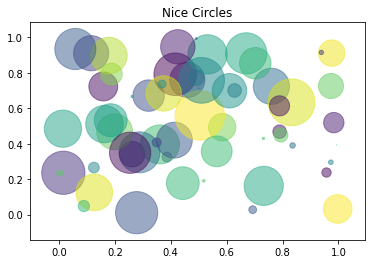

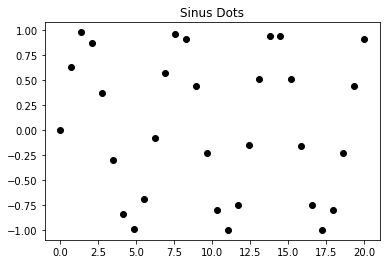

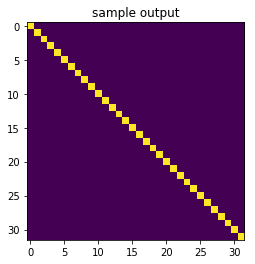

In [5]:
%matplotlib inline
N = task_params['num_scatter_samples']
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (50 * np.random.rand(N))**2  # 0 to 15 point radii
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Nice Circles')
plt.show()

x = np.linspace(0, task_params['sin_max_value'], task_params['sin_steps'])
y = np.sin(x)
plt.plot(x, y, 'o', color='black')
plt.title('Sinus Dots')
plt.show()

m = np.eye(32, 32, dtype=np.uint8)
plt.imshow(m)
plt.title('sample output')
plt.show()

In [6]:
# Notice, Updating task_params is traced and updated in TRAINS
task_params['batch_size'] = 128
task_params['nb_classes'] = 10
task_params['nb_epoch'] = 6
task_params['hidden_dim'] = 512
batch_size = task_params['batch_size']
nb_classes = task_params['nb_classes']
nb_epoch = task_params['nb_epoch']

In [7]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

hidden_dim = task_params['hidden_dim']
model = Sequential()
model.add(Dense(hidden_dim, input_shape=(784,)))
model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense(hidden_dim))
model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

board = TensorBoard(histogram_freq=1, log_dir='/tmp/histogram_example')
model_store = ModelCheckpoint(filepath='/tmp/weight.{epoch}.hdf5')

model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=nb_epoch,
                    callbacks=[board, model_store],
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
___________